# Machine learning final project EDA

I wanted to examine a dataset related to educational outcomes so I chose [This dataset about test performance](https://www.kaggle.com/datasets/muhammadroshaanriaz/students-performance-dataset-cleaned).\
I had initially selected this dataset because it was tangentially related to a different project that didn't work out. I think this project can also provide interesting insights into potential biases in ML models,\
since most of the non-target variables relate to sensitive demographic information in some way (social class, race, gender etc.)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned_students_performance.csv')
print(df.head())
print(df['average_score'].describe())

   gender race_ethnicity parental_level_of_education  lunch  \
0       0        group B           bachelor's degree      1   
1       0        group C                some college      1   
2       0        group B             master's degree      1   
3       1        group A          associate's degree      0   
4       1        group C                some college      1   

   test_preparation_course  math_score  reading_score  writing_score  \
0                        0          72             72             74   
1                        1          69             90             88   
2                        0          90             95             93   
3                        0          47             57             44   
4                        0          76             78             75   

   total_score  average_score  
0          218      72.666667  
1          247      82.333333  
2          278      92.666667  
3          148      49.333333  
4          229      76.33333

# Initial EDA

As we can see, the average student is not doing better than a C on these tests.\
Because our data contains so many categorical variables, a pairplot doesn't make a lot of sense here.\
An obvious first thing to do is look at the demographic breakdown of our dataset, starting with:


# Gender

For all of these I'll just be using the "average_score" variable. There are some interesting things we could do with the different test scores, but for now we'll focus on the main one.

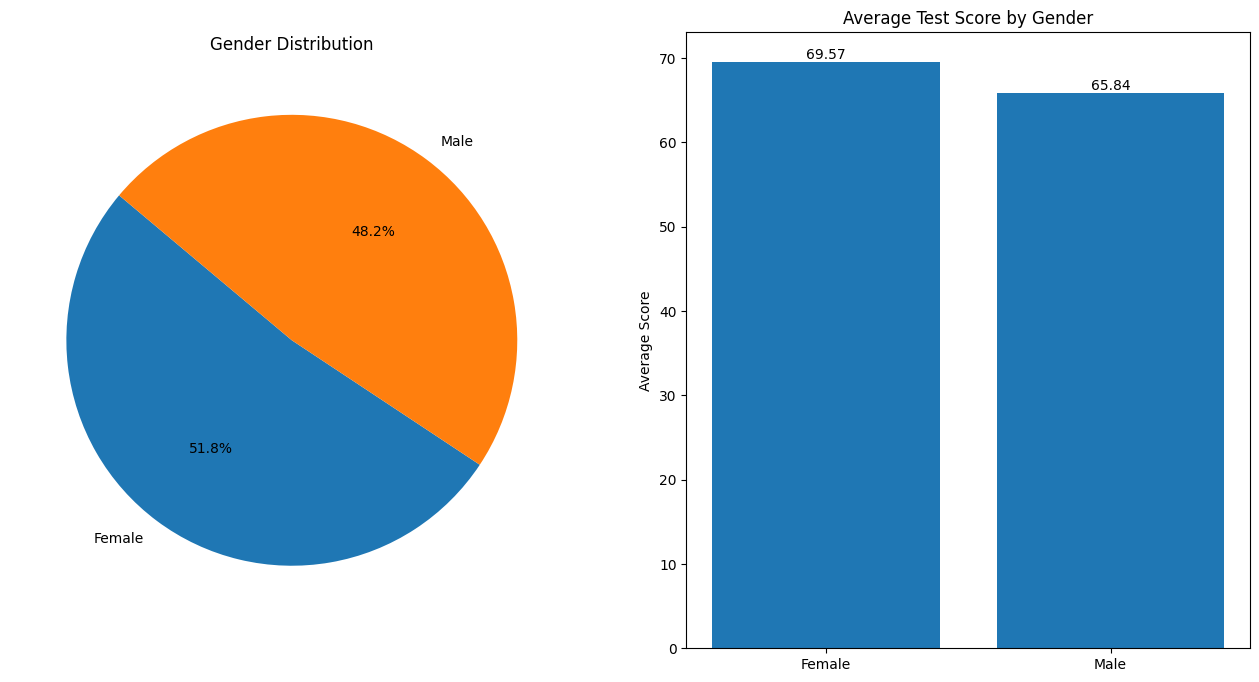

In [11]:

# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Calculate the average test score for each gender
average_scores_by_gender = df.groupby('gender')['average_score'].mean()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart for gender distribution
axs[0].pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Gender Distribution')

# Plot the bar chart for average test scores by gender
bars = axs[1].bar(['Female', 'Male'], average_scores_by_gender)
axs[1].set_title('Average Test Score by Gender')
axs[1].set_ylabel('Average Score')

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# Gender demographics
We can see that there are slightly more girls than boys, and that girls are bringing up the average quite a bit. We might learn more by examining the underlying distributions:

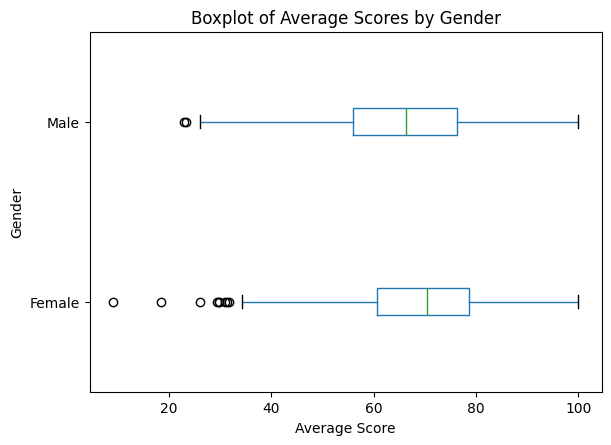

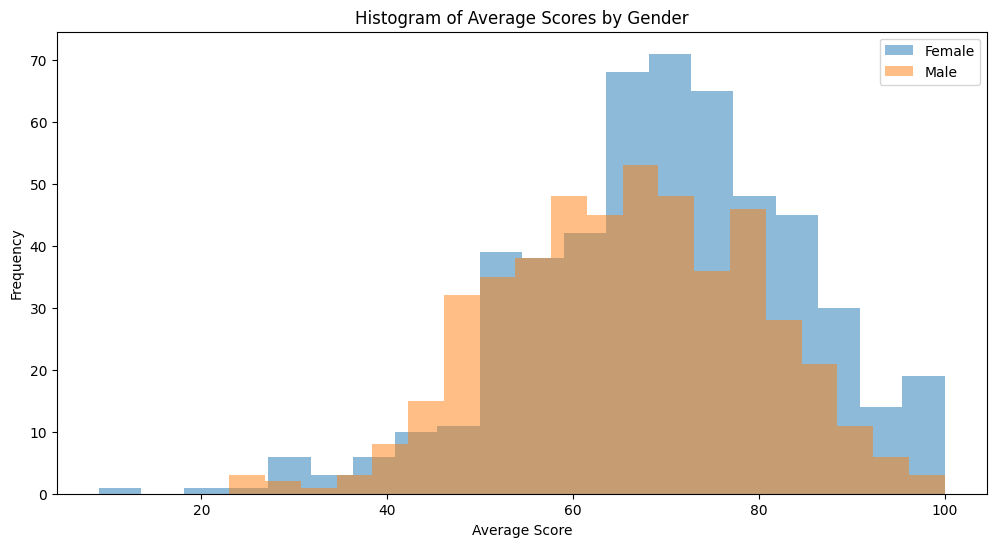

        count       mean        std   min        25%        50%        75%  \
gender                                                                       
0       518.0  69.569498  14.541809   9.0  60.666667  70.333333  78.666667   
1       482.0  65.837483  13.698840  23.0  56.000000  66.333333  76.250000   

          max  
gender         
0       100.0  
1       100.0  


In [21]:
# Create the horizontal boxplot
df.boxplot(column='average_score', by='gender', grid=False, vert=False)
plt.ylabel('Gender')
plt.xlabel('Average Score')
plt.title('Boxplot of Average Scores by Gender')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.yticks([1, 2], ['Female', 'Male'])
plt.show()

# Create paired histograms for average scores by gender
plt.figure(figsize=(12, 6))
plt.hist(df[df['gender'] == 0]['average_score'], bins=20, alpha=0.5, label='Female')
plt.hist(df[df['gender'] == 1]['average_score'], bins=20, alpha=0.5, label='Male')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.title('Histogram of Average Scores by Gender')
plt.legend(loc='upper right')
plt.show()

# Print the summary statistics by gender
print(df.groupby('gender')['average_score'].describe())



# Gender distribution breakdown
Looking at these distributions, there are some surprising trends, we see that despite the majority of extremely low values being with the girls, the performance of boys is in general worse. The uppoer ends of both distributions are comparable.

# Race/Ethnicity 

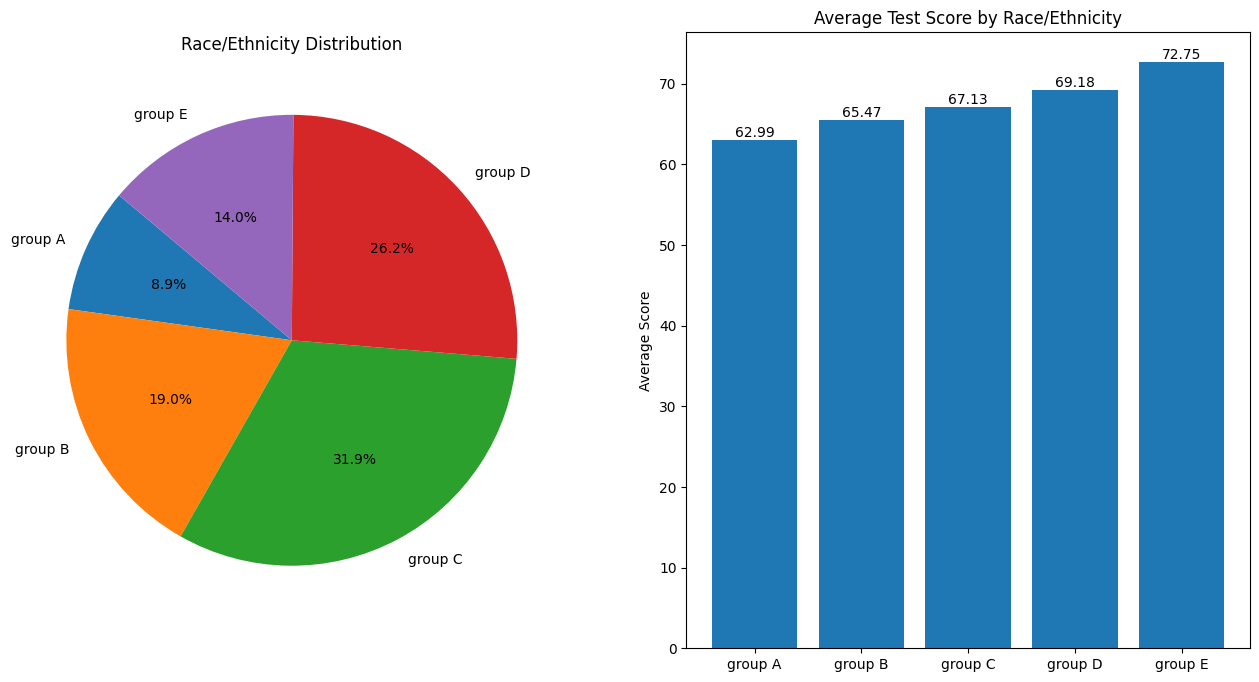

In [13]:
# Count the occurrences of each race/ethnicity and sort them alphabetically
race_counts = df['race_ethnicity'].value_counts().sort_index()

# Calculate the average test score for each race/ethnicity
average_scores_by_race = df.groupby('race_ethnicity')['average_score'].mean()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart for race/ethnicity distribution
axs[0].pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Race/Ethnicity Distribution')

# Plot the bar chart for average test scores by race/ethnicity
bars = axs[1].bar(average_scores_by_race.index, average_scores_by_race)
axs[1].set_title('Average Test Score by Race/Ethnicity')
axs[1].set_ylabel('Average Score')

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# Race/Ethnicity Demographics
We can see that groups C and D are the majority of students, group B is roughly proportional(1/5th), and A and E are in the minority. Interestingly, the two smallest groups have the best and worst average test scores.

<Figure size 1200x600 with 0 Axes>

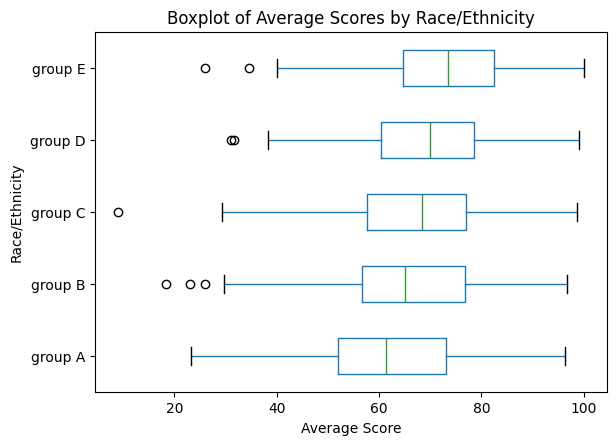

                count       mean        std        min        25%        50%  \
race_ethnicity                                                                 
group A          89.0  62.992509  14.444598  23.333333  52.000000  61.333333   
group B         190.0  65.468421  14.732133  18.333333  56.666667  65.000000   
group C         319.0  67.131661  13.872211   9.000000  57.666667  68.333333   
group D         262.0  69.179389  13.252776  31.000000  60.333333  70.000000   
group E         140.0  72.752381  14.565016  26.000000  64.666667  73.500000   

                      75%         max  
race_ethnicity                         
group A         73.000000   96.333333  
group B         76.833333   96.666667  
group C         77.000000   98.666667  
group D         78.583333   99.000000  
group E         82.416667  100.000000  


In [14]:
# Sort the DataFrame by 'race_ethnicity' in descending order
df_sorted = df.sort_values('race_ethnicity', ascending=False)

# Create the horizontal boxplot using the sorted DataFrame
plt.figure(figsize=(12, 6))
df_sorted.boxplot(column='average_score', by='race_ethnicity', grid=False, vert=False)
plt.ylabel('Race/Ethnicity')
plt.xlabel('Average Score')
plt.title('Boxplot of Average Scores by Race/Ethnicity')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.show()

# Print the summary statistics by race/ethnicity (based on sorted DataFrame)
print(df_sorted.groupby('race_ethnicity')['average_score'].describe())



Looking at these box plots and summary statistics doesn't tell us much. Attempting to do a paired histogram like with the last set of variables didn't work out very well and was too hard to read, looking at the proportions of students who do better than 70 and comparing them with the total counts can provide insight:

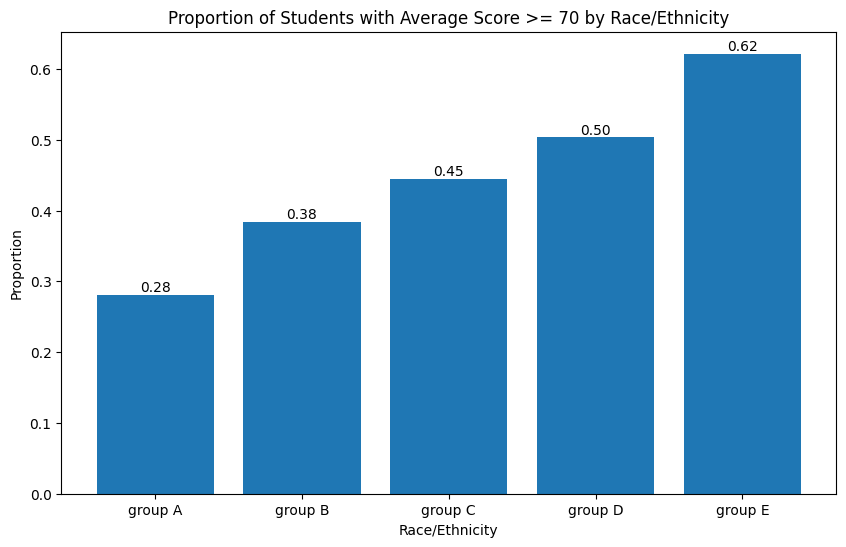

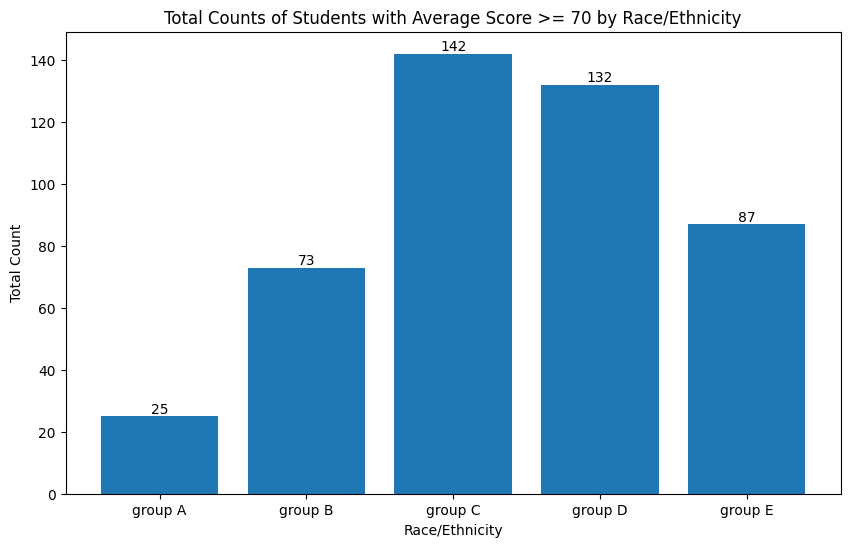

In [15]:

# Calculate the proportion of students with a score above 70 by race/ethnicity
proportion_above_70_by_race = (df[df['average_score'] >= 70]['race_ethnicity'].value_counts().sort_index() / df['race_ethnicity'].value_counts().sort_index())

# Create a bar chart for the proportion of students with a score above 70 by race/ethnicity
plt.figure(figsize=(10, 6))
bars = plt.bar(proportion_above_70_by_race.index, proportion_above_70_by_race)
plt.title('Proportion of Students with Average Score >= 70 by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Proportion')

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# Create a bar chart for the total counts of students with a score above 70 by race/ethnicity
total_counts_above_70_by_race = (df[df['average_score'] >= 70]['race_ethnicity'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
bars = plt.bar(total_counts_above_70_by_race.index, total_counts_above_70_by_race)
plt.title('Total Counts of Students with Average Score >= 70 by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Total Count')

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.show()

We can see that, group A is not doing very well, only about a quarter of them are passing. In general everybody but group E seems to be doing quite poorly.
A  thing to be wary of is how this can induce bias in our model, we should be cautious about it showing discrimination towards groupe A or favoritism towards group E.

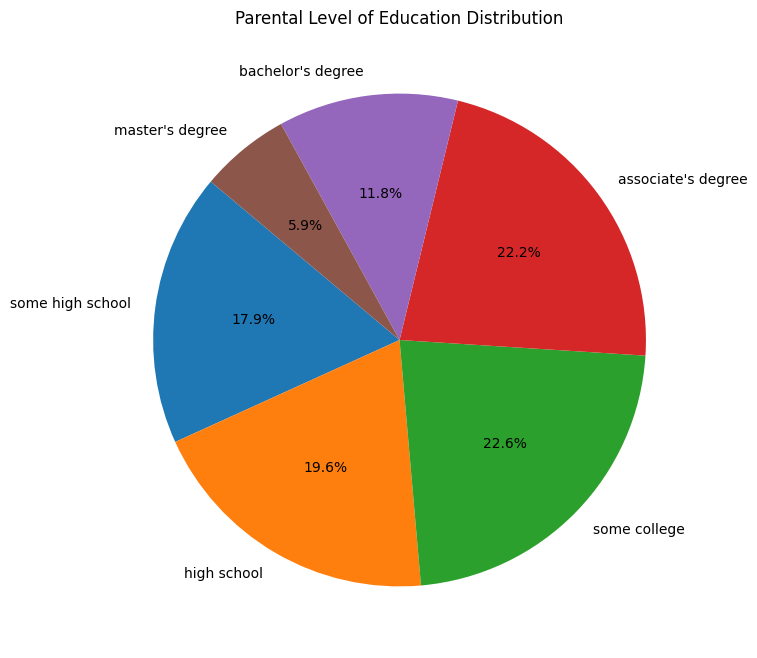

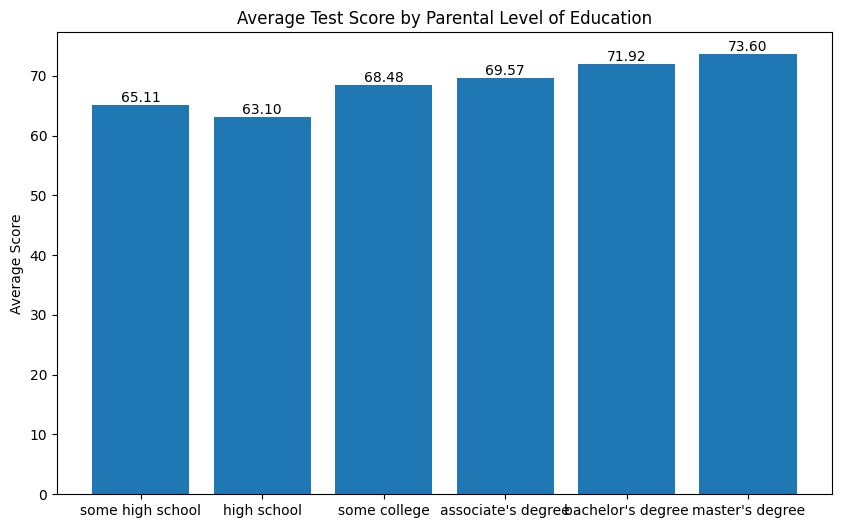

In [19]:
# Define the custom order for the education levels
education_order = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]

# Convert the 'parental_level_of_education' column to a categorical type with the specified order
df['parental_level_of_education'] = pd.Categorical(df['parental_level_of_education'], categories=education_order, ordered=True)

# Count the occurrences of each parental level of education and sort them by the specified order
education_counts = df['parental_level_of_education'].value_counts().sort_index()

# Calculate the average test score for each parental level of education
average_scores_by_education = df.groupby('parental_level_of_education', observed=False)['average_score'].mean().reindex(education_order)

# Plot the pie chart for parental level of education distribution
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Parental Level of Education Distribution')
plt.show()

# Plot the bar chart for average test scores by parental level of education
plt.figure(figsize=(10, 6))
bars = plt.bar(average_scores_by_education.index, average_scores_by_education)
plt.title('Average Test Score by Parental Level of Education')
plt.ylabel('Average Score')

# Add values on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

If you're reading this then this is the end of the milestone submission.

I currently plan to:
- add more on parental educational background
- Talk about the test prep variable
- Talk about the lunch variable (it's whether they receive free/discounted lunch or not)
- examine gender differences and educational background differences among ethnic groups. Discuss how my chosen models will likely interpret this data and how it could influence bias.
- Reduce this to a classification problem (above 70 = pass, below = fail). 
- Train a boosted gradient regressor and neural network, compare.
- Expand on the bias discussion by training another model to take in one test score and predict the average from that + our demographic data.
- Talk about different potential contexts and how they impact the ethics of this problem, for example: Are we attempting to highlight at-risk students for intervention, or trying to select university/internship applicants? 